In [ ]:
import pandas as pd
import numpy as np
import ast
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
file_path = '/content/p.csv'
df = pd.read_csv(file_path)
print("Dataset shape:", df.shape)

Dataset shape: (359211, 39)


In [ ]:
df.head()

,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,resource_request,...,tail_cpu_usage_distribution,cluster,event,failed,duration,avg_usage_cpu,avg_usage_mem,max_usage_cpu,max_usage_mem,rand_usage_cpu
0,1970-01-01 00:00:00.000000000,2,94591244395,3,1,200,0,144,168846390496,"{'cpus': 0.020660400390625, 'memory': 0.014434...",...,[0.00535583 0.00541687 0.00548553 0.00554657 0...,7.0,FAIL,1.0,1.000000,0.008663,0.026445,0.009361,0.026455,0.006747
1,1970-01-01 00:41:57.305308183,2,260697606809,2,0,360,221495397286,335,85515092,"{'cpus': 0.00724029541015625, 'memory': 0.0013...",...,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,7.0,FAIL,1.0,0.000000,0.000000,0.000004,0.000000,0.000004,0.000000
2,1970-01-01 00:03:15.684022913,6,276227177776,2,0,103,0,376,169321752432,"{'cpus': 0.048583984375, 'memory': 0.004165649...",...,[0.02902222 0.02929688 0.0295105 0.0296936 0...,7.0,SCHEDULE,0.0,1.000000,0.044975,0.012456,0.047235,0.012684,0.041051
3,1970-01-01 00:00:00.000000000,2,10507389885,3,0,200,0,1977,178294817221,"{'cpus': 0.0704345703125, 'memory': 0.04162597...",...,[0.05535889 0.05584717 0.05633545 0.05718994 0...,8.0,FAIL,1.0,1.000000,0.088475,0.153762,0.104839,0.154516,0.078883
4,1970-01-01 00:30:10.627494172,3,25911621841,2,0,0,0,3907,231364893292,"{'cpus': 0.00244903564453125, 'memory': 0.0002...",...,[0.00041485 0.00041485 0.00041485 0.00041485 0...,2.0,FINISH,0.0,0.003344,0.000503,0.000341,0.000326,0.000340,0.000530


In [ ]:
df = df.dropna()


In [ ]:
df.shape

(354867, 39)

In [ ]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation with 'failed'
correlation = df_numeric.corr()['failed'].sort_values(ascending=False)
print(correlation)


failed                             1.000000
scheduling_class                   0.151589
duration                           0.143492
alloc_collection_id                0.124444
priority                           0.091557
memory_accesses_per_instruction    0.075148
cycles_per_instruction             0.062883
cluster                            0.029750
max_usage_cpu                      0.007868
instance_index                     0.004538
rand_usage_cpu                     0.003799
avg_usage_cpu                      0.003492
sample_rate                       -0.008934
machine_id                        -0.008984
avg_usage_mem                     -0.023227
max_usage_mem                     -0.023368
page_cache_memory                 -0.040150
assigned_memory                   -0.066307
collection_type                   -0.081239
collection_id                     -0.084916
scheduler                         -0.141618
vertical_scaling                  -0.228154
instance_events_type            

In [ ]:
selected_features = [
    'scheduling_class', 'duration', 'alloc_collection_id', 'priority',
    'memory_accesses_per_instruction', 'cycles_per_instruction',
    'vertical_scaling', 'scheduler', 'collection_id', 'collection_type'
]

X = df[selected_features]
y = df['failed']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")


Training Set: (283893, 10), Test Set: (70974, 10)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use same scaler for test set


In [ ]:
import pandas as pd
import numpy as np

# Get feature importance from Random Forest
importances = rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance.sort_values(by='Importance', ascending=False))


                           Feature  Importance
8                    collection_id    0.239758
4  memory_accesses_per_instruction    0.191182
5           cycles_per_instruction    0.184897
1                         duration    0.096829
6                 vertical_scaling    0.069298
3                         priority    0.068692
2              alloc_collection_id    0.061525
0                 scheduling_class    0.056118
7                        scheduler    0.018627
9                  collection_type    0.013074


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)


print("📌 Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))


📌 Logistic Regression Performance:
              precision    recall  f1-score   support

         0.0       0.87      0.63      0.73     54714
         1.0       0.35      0.68      0.47     16260

    accuracy                           0.64     70974
   macro avg       0.61      0.66      0.60     70974
weighted avg       0.75      0.64      0.67     70974



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("📌 Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

📌 Random Forest Performance:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     54714
         1.0       0.99      1.00      0.99     16260

    accuracy                           1.00     70974
   macro avg       0.99      1.00      1.00     70974
weighted avg       1.00      1.00      1.00     70974



In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("📌 XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:37:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 XGBoost Performance:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     54714
         1.0       0.98      0.97      0.97     16260

    accuracy                           0.99     70974
   macro avg       0.98      0.98      0.98     70974
weighted avg       0.99      0.99      0.99     70974



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbm.fit(X_train, y_train)

y_pred_gbm = gbm.predict(X_test)
print("📌 Gradient Boosting Performance:")
print(classification_report(y_test, y_pred_gbm))


📌 Gradient Boosting Performance:
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     54714
         1.0       0.82      0.56      0.67     16260

    accuracy                           0.87     70974
   macro avg       0.85      0.76      0.79     70974
weighted avg       0.87      0.87      0.86     70974



In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)
print("📌 LightGBM Performance:")
print(classification_report(y_test, y_pred_lgbm))


[LightGBM] [Info] Number of positive: 65039, number of negative: 218854
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1190
[LightGBM] [Info] Number of data points in the train set: 283893, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.229097 -> initscore=-1.213418
[LightGBM] [Info] Start training from score -1.213418
📌 LightGBM Performance:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     54714
         1.0       0.95      0.91      0.93     16260

    accuracy                           0.97     70974
   macro avg       0.96      0.95      0.96     70974
weighted avg       0.97      0.97      0.97     70974



In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)
print("📌 SVM Performance:")
print(classification_report(y_test, y_pred_svm))


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

y_pred_mlp = mlp.predict(X_test_scaled)
print("📌 MLP Performance:")
print(classification_report(y_test, y_pred_mlp))


📌 MLP Performance:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     54714
         1.0       0.94      0.95      0.95     16260

    accuracy                           0.98     70974
   macro avg       0.96      0.97      0.97     70974
weighted avg       0.98      0.98      0.98     70974



In [ ]:
import numpy as np
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define LSTM Model
model_lstm = keras.Sequential([
    keras.layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    keras.layers.LSTM(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile Model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history_lstm = model_lstm.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))

# Evaluate Model
test_loss_lstm, test_acc_lstm = model_lstm.evaluate(X_test_lstm, y_test)
print("LSTM Test Accuracy:", test_acc_lstm)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


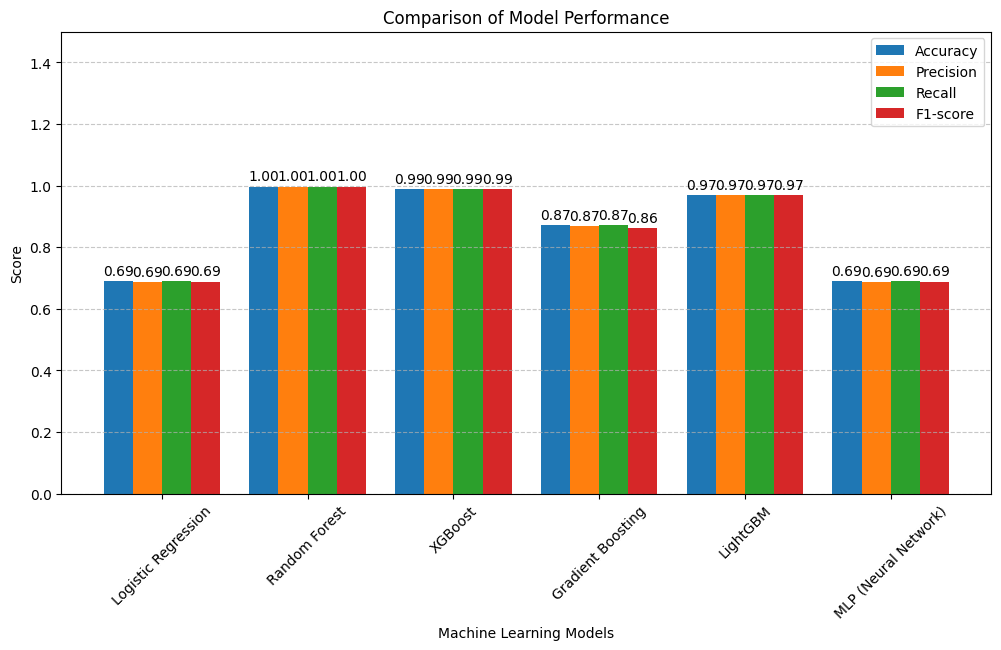

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store model performance
model_performance = {}

# List of models
models = {
    "Logistic Regression": logreg,
    "Random Forest": rf,
    "XGBoost": xgb,
    "Gradient Boosting": gbm,
    "LightGBM": lgbm,
    #"SVM": svm,
    "MLP (Neural Network)": mlp
}

# Calculate evaluation metrics for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    model_performance[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-score": f1_score(y_test, y_pred, average='weighted')
    }

# Convert dictionary to a format for plotting
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
model_names = list(model_performance.keys())

# Prepare data for plotting
values = np.array([[model_performance[model][metric] for model in model_names] for metric in metrics])

# Plot grouped bar chart
bar_width = 0.2
x = np.arange(len(model_names))

plt.figure(figsize=(12, 6))

# Plot bars for each metric
for i, metric in enumerate(metrics):
    plt.bar(x + i * bar_width, values[i], width=bar_width, label=metric)

# Labeling
plt.xlabel("Machine Learning Models")
plt.ylabel("Score")
plt.title("Comparison of Model Performance")
plt.xticks(x + bar_width * 1.5, model_names, rotation=45)
plt.ylim(0, 1.5)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show values on bars
for i in range(len(metrics)):
    for j in range(len(model_names)):
        plt.text(x[j] + i * bar_width, values[i][j] + 0.02, f"{values[i][j]:.2f}", ha='center', fontsize=10)

plt.show()




---



---

